
# Prediction of Student Graduation


#### Nama : Bagas Dwi Santosa
#### NPM  : 212103006
#### Prodi : Sistem Informasi
#### Semester : 5
#### Mata Kuliah : Data Mining 1
#### Dosen : Herdiesel Santoso, S.T., S.Kom., M.Cs
#### Universitas : Universitas Jenderal Achmad Yani Yogyakarta



### Link Deploy : https://bagasdwisss.pythonanywhere.com/

### Link Github : https://github.com/BagasDwiSantosa/TA_DATA-MINING_PREDICTIONS-STUDENT-GRADUATION-BAGAS-DS


# Introduction

Di notebook ini, Saya  menggunakan scikit-learn untuk mengimplementasikan beberapa algoritma seperti Random Forest, Linear Reggression, dan lain lain. Data yang digunakan adalah data akademik mahasiswa. Tahap yang dilakukan meliputi Eksploratory Data Analysis, Preprocessing data, membuat model dan mengevaluasi model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


# Understanding the Data

`train.csv`:
Dataset ini berisi Column sebagai berikut:

- **NAMA** e.g. Bagas
- **JENIS KELAMIN** e.g. Perempuan
- **STATUS MAHASISWA** e.g. Mahasiswa
- **UMUR** e.g. 4.0
- **STATUS NIKAH** e.g 6.0
- **IPS 1** e.g. 4.00
- **IPS 2** e.g. 4.00
- **IPS 3** e.g. 4.00
- **IPS 4** e.g. 4.00
- **IPS 5** e.g. 4.00
- **IPS 6** e.g. 4.00
- **IPS 7** e.g. 4.00
- **IPS 8** e.g. 4.00
- **IPK** e.g. 4.00
- **STATUS KELULUSAN** e.g. Tepat

In [3]:
train = pd.read_excel('/content/drive/MyDrive/dataset/Kelulusan Train.xlsx')
train.head(5)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [4]:
test = pd.read_excel('/content/drive/MyDrive/dataset/Kelulusan Test.xlsx')
test.head(5)

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,0.00,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


# EDA | Exploratory Data Analysis

Exploratory Data Analysis (EDA) bertujuan untuk memahami dataset yang dimiliki tanpa membuat asumsi sebelumnya. Ini melibatkan penggunaan teknik visualisasi dan analisis statistik untuk menjelajahi, meringkas, dan memahami pola, hubungan, serta karakteristik utama dari data yang ada.

Struktur dan karakteristik dari DataFrame Train dan Test

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             145 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             379 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


Menghitung jumlah nilai NaN (Not a Number) pada setiap kolom dalam DataFrame. Dari hasil yang tertera, masing-masing kolom tidak memiliki nilai NaN

In [7]:
train.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [9]:
test.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 3
STATUS KELULUSAN    0
dtype: int64

describe() tersebut digunakan untuk mendeskripsikan data dalam DataFrame 'df' sehingga menghasilkan tabel yang berisi statistik deskriptif meliputi :
- Mean: rata-rata nilai
- Standard deviation: standar deviasi nilai
- Minimum: nilai minimum
- 25%: kuartil pertama (25% nilai terkecil)
- 50%: median (nilai tengah)
- 75%: kuartil ketiga (75% nilai terbesar)
- Maximum: nilai maksimum

In [11]:
train.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.248338,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.398434,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.610000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.725000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [10]:
test.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,142.000000
mean,24.475862,2.882345,2.893862,2.857310,2.990828,2.932552,2.903034,2.579379,1.879379,2.949859
std,2.395258,0.358099,0.414159,0.540566,0.513567,0.423699,0.591917,0.746163,1.522290,0.489989
min,22.000000,1.790000,0.500000,0.160000,0.320000,1.130000,0.000000,0.000000,0.000000,0.870000
25%,23.000000,2.620000,2.660000,2.480000,2.770000,2.700000,2.650000,2.250000,0.000000,2.820000
50%,24.000000,2.900000,2.910000,2.930000,3.000000,2.980000,2.940000,2.640000,2.500000,3.035000
75%,25.000000,3.100000,3.140000,3.270000,3.270000,3.240000,3.310000,3.150000,3.000000,3.237500
max,40.000000,3.710000,3.790000,3.960000,3.910000,3.780000,3.940000,3.910000,4.000000,3.850000


Membuat boxplot untuk setiap variabel numerik dalam dataset, sehingga dari hasil tersebut dapat membantu kita untuk melihat distribusi data dan mengidentifikasi outlier.

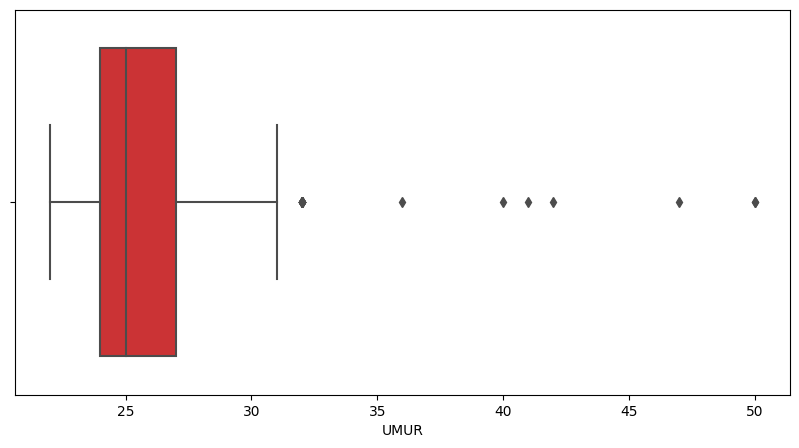

<Figure size 640x480 with 0 Axes>

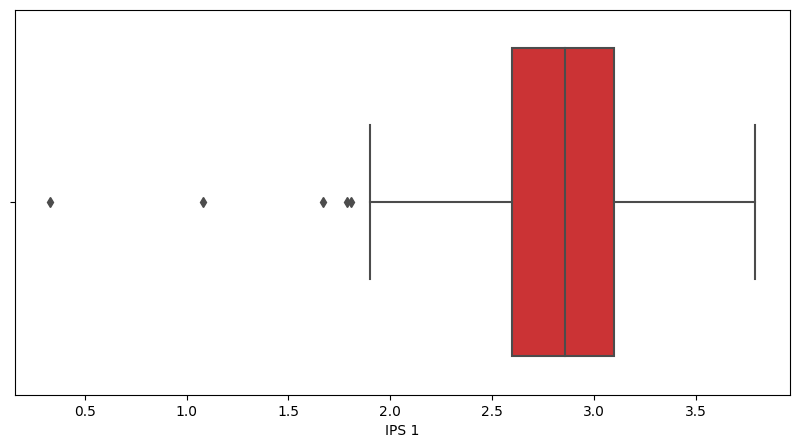

<Figure size 640x480 with 0 Axes>

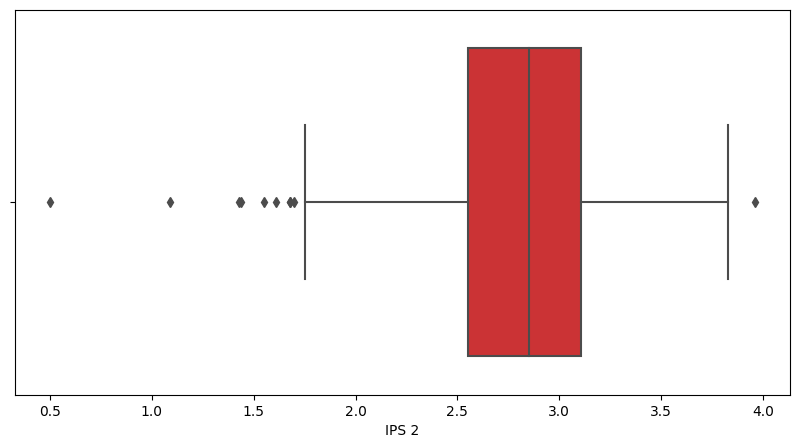

<Figure size 640x480 with 0 Axes>

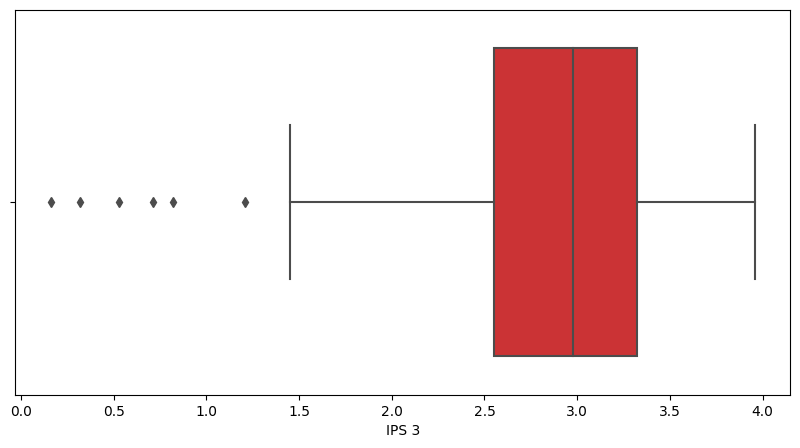

<Figure size 640x480 with 0 Axes>

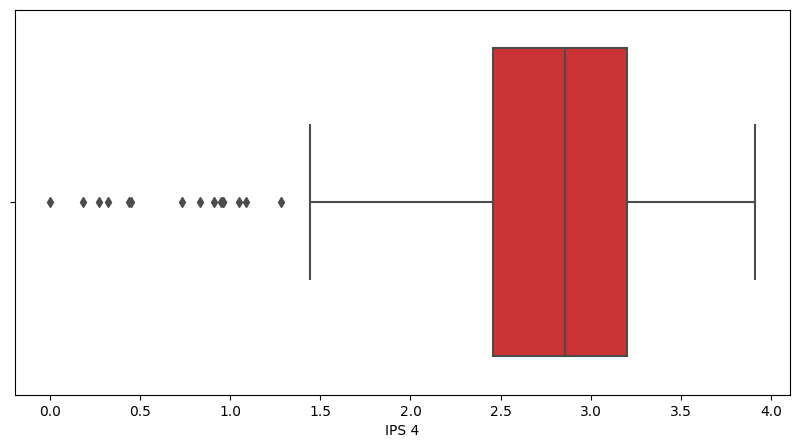

<Figure size 640x480 with 0 Axes>

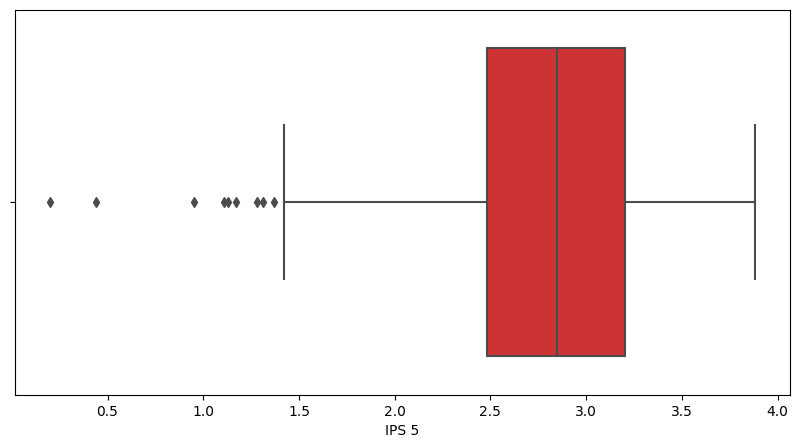

<Figure size 640x480 with 0 Axes>

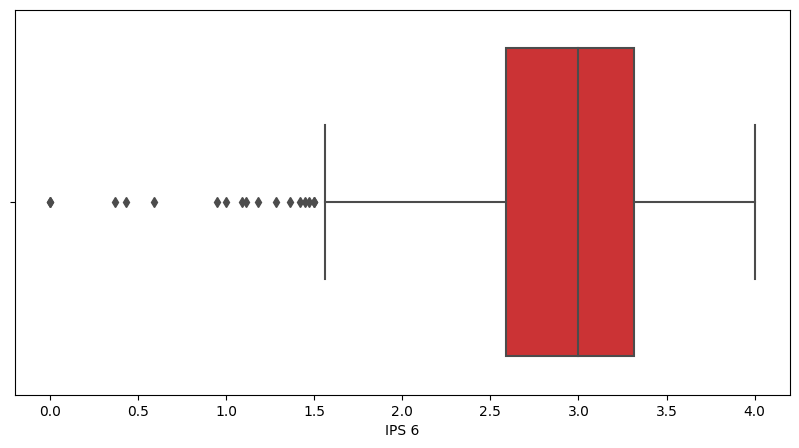

<Figure size 640x480 with 0 Axes>

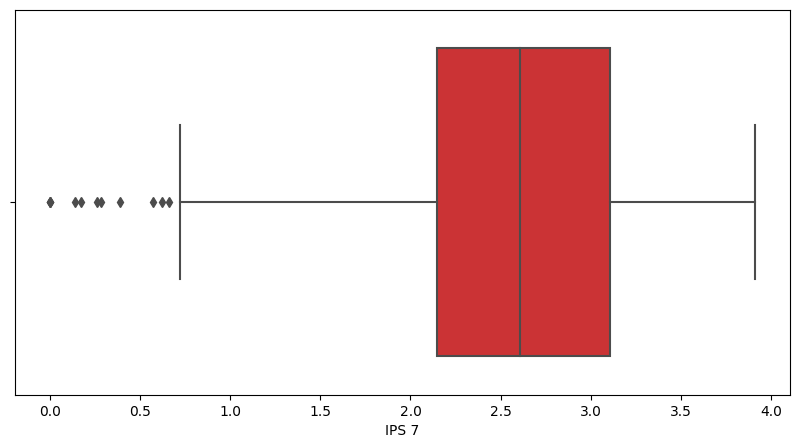

<Figure size 640x480 with 0 Axes>

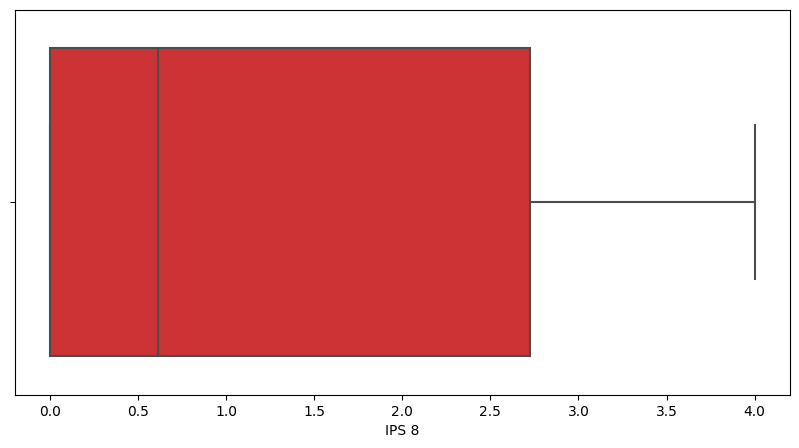

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_feat = ['UMUR', 'IPS 1', 'IPS 2','IPS 3','IPS 4', 'IPS 5','IPS 6', 'IPS 7', 'IPS 8']

for num in num_feat :
  plt.figure(figsize = (10,5))
  sns.boxplot(data = train, x = num, palette = 'Set1')
  plt.figure()

Heatmap dari korelasi antara beberapa kolom Train

Histogram untuk menunjukkan distribusi frekuensi atau pola distribusi dari suatu variabel numerik

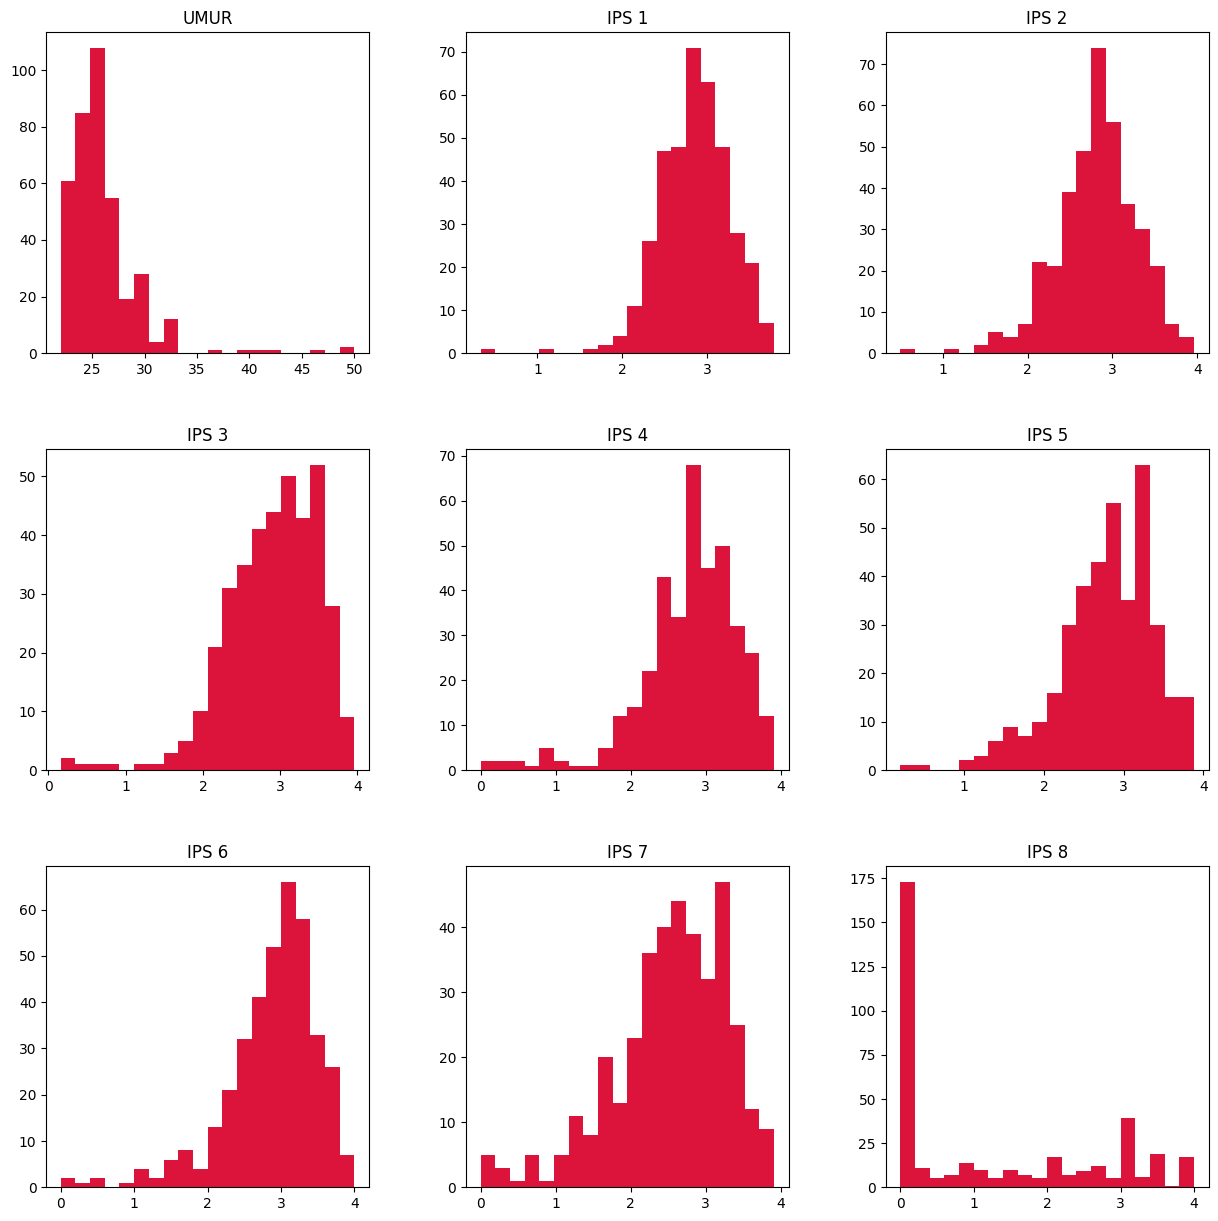

In [18]:
data = train[['UMUR', 'IPS 1', 'IPS 2','IPS 3','IPS 4', 'IPS 5','IPS 6', 'IPS 7', 'IPS 8']]
data.hist(bins = 20, figsize = (15, 15), color = "crimson", grid = False)
plt.show()

Melihat hubungan antara pasangan variabel numerik

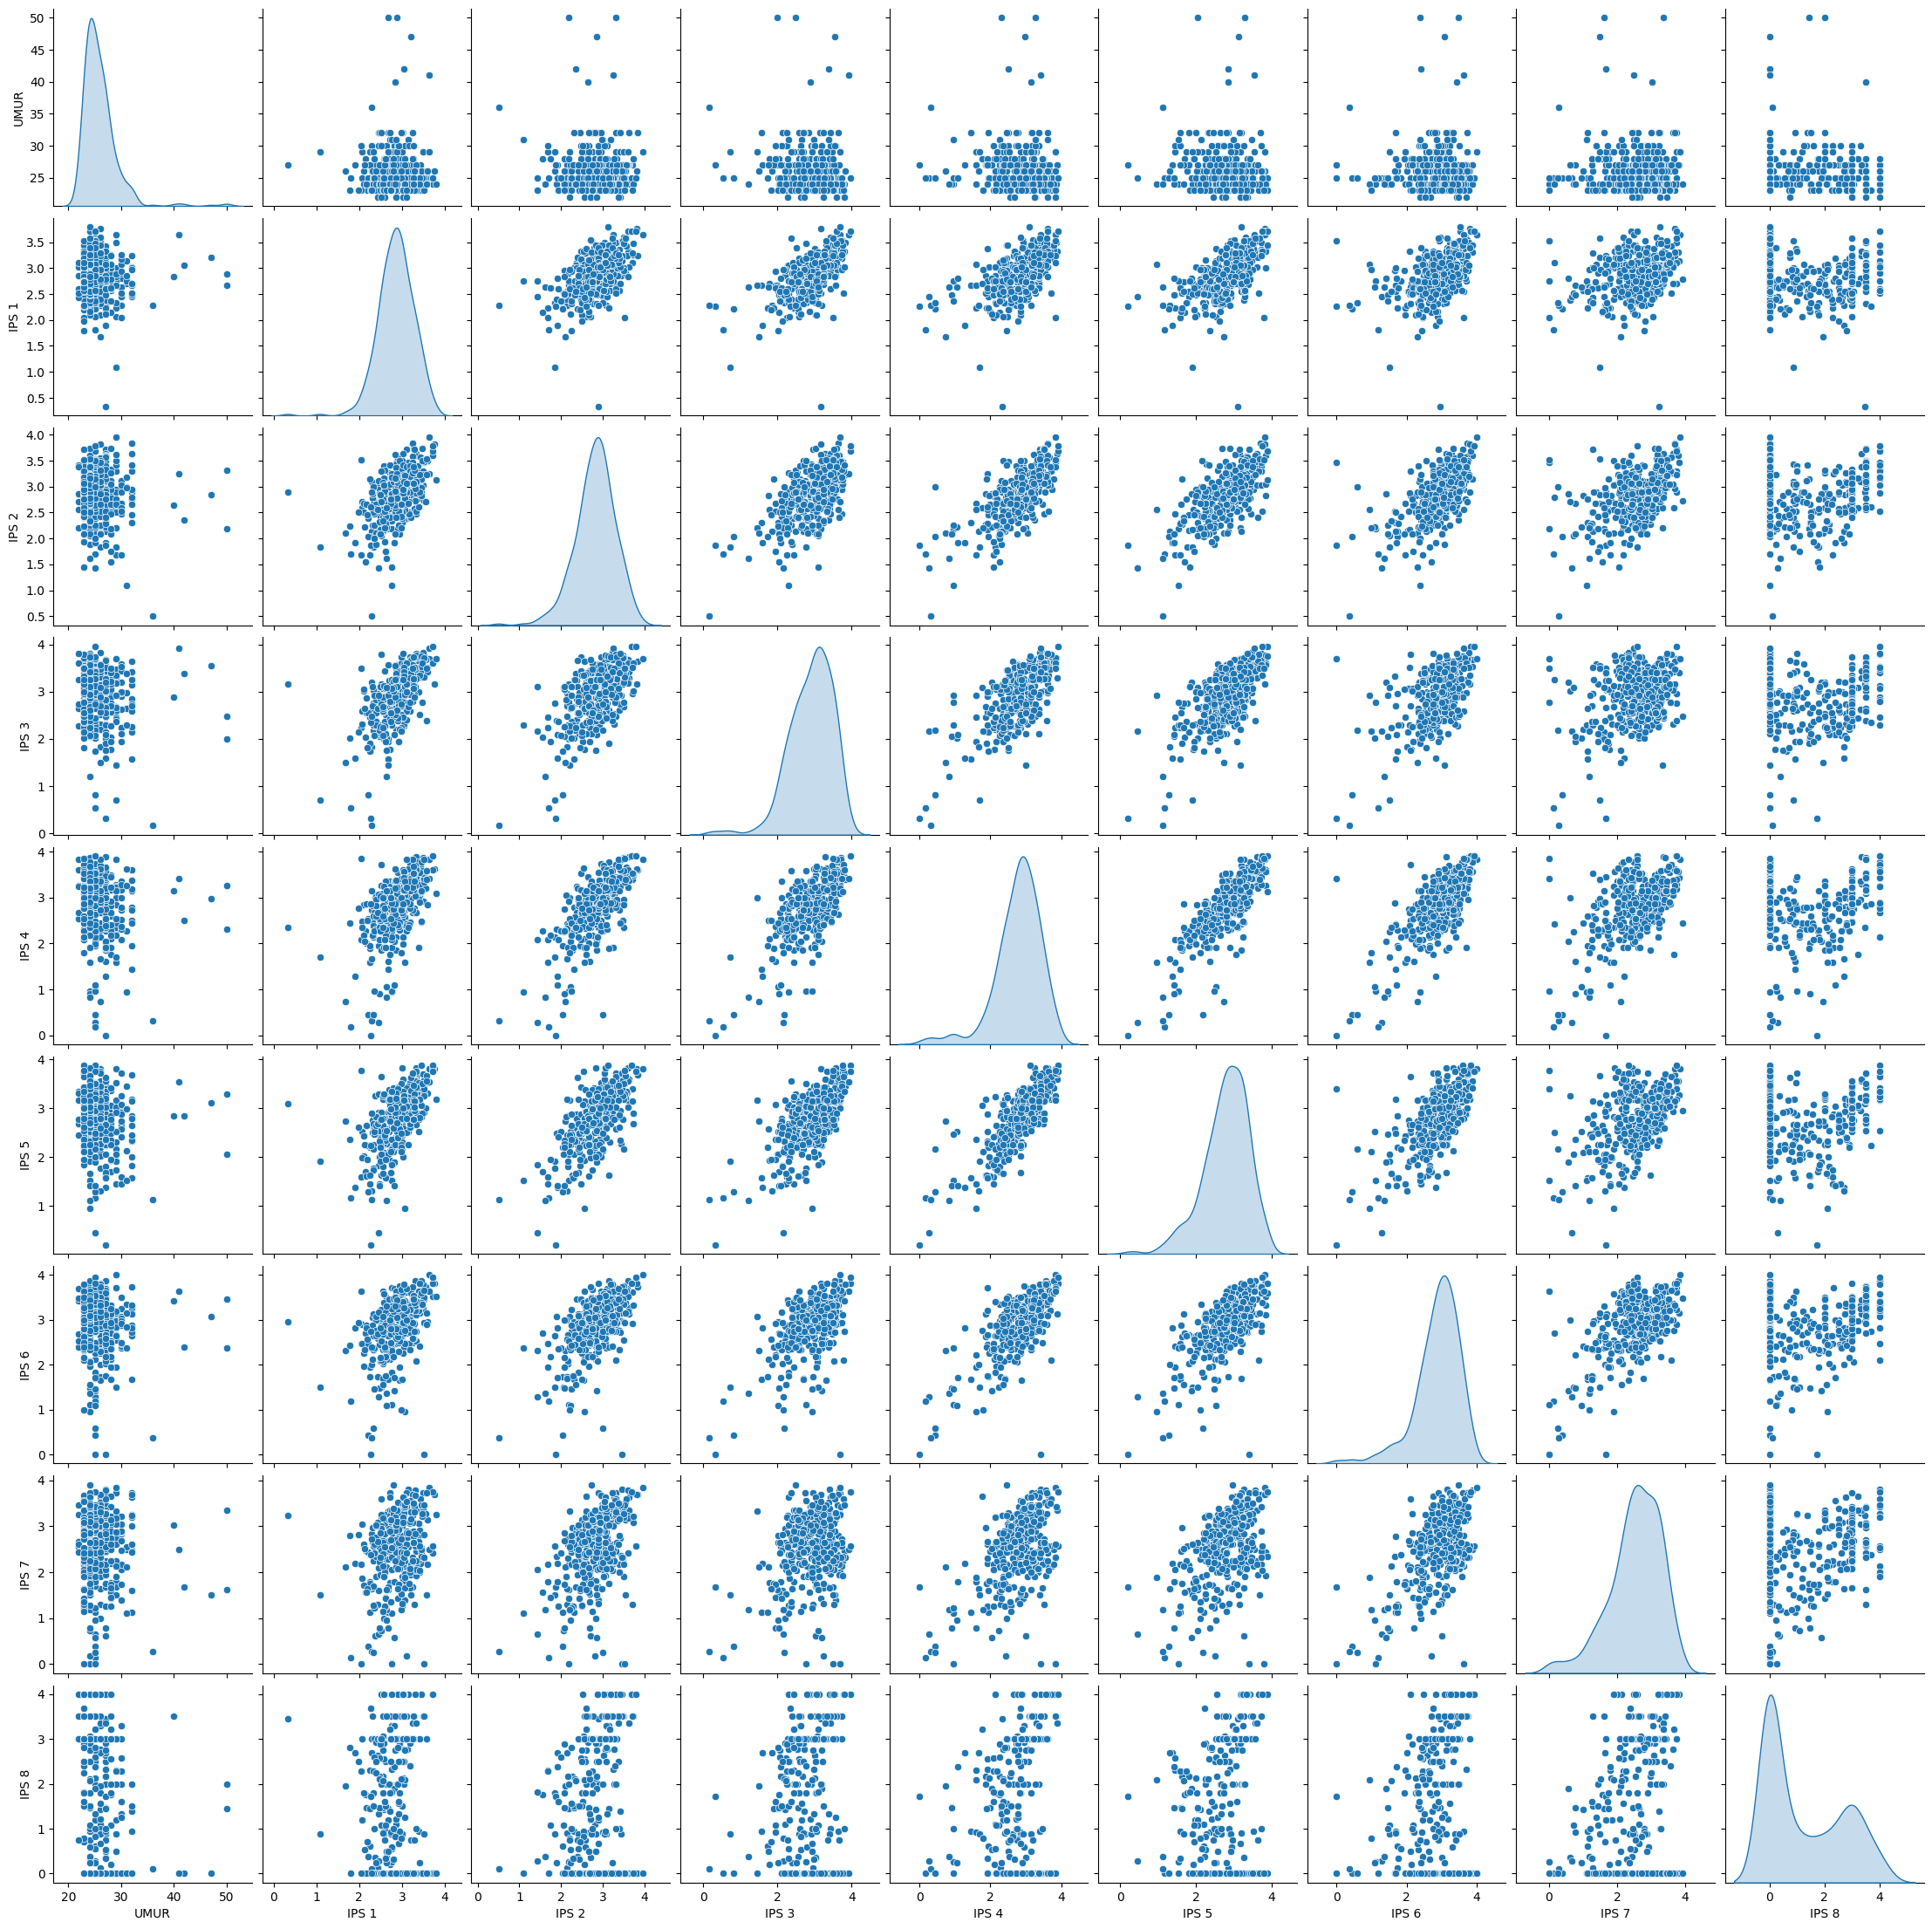

In [19]:
#Numeric
sns.pairplot(data, diag_kind = 'kde')

Menampilkan matriks korelasi untuk fitur numerik

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

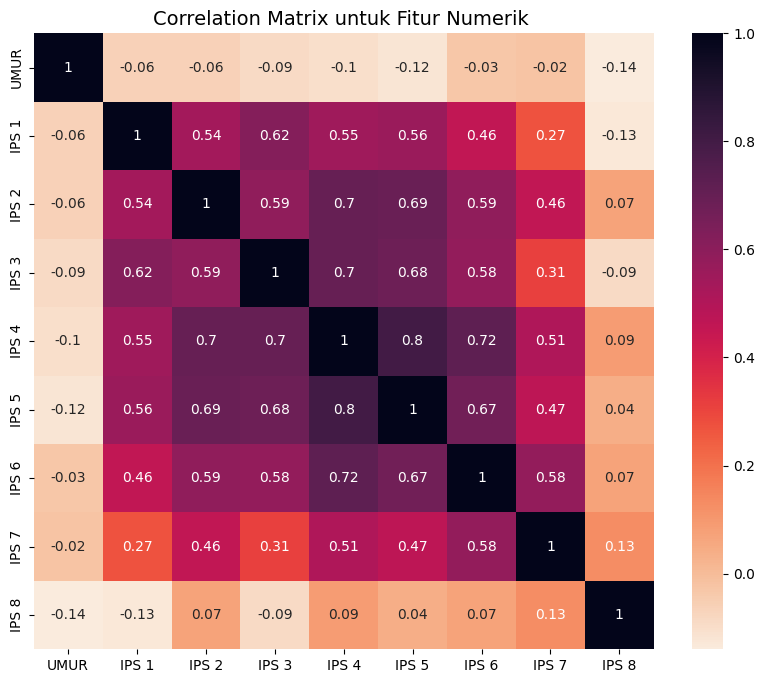

In [20]:
#Skor korelasi
plt.figure(figsize = (10,8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix untuk Fitur Numerik ", size = 14)

# Preprocessing Data

Tujuan dari preprocessing adalah untuk membersihkan, mentransformasi, dan mempersiapkan data sehingga sesuai untuk analisis atau pemodelan.

Fungsi lambda untuk mengubah nilai dalam kolom menjadi nilai numerik (1 atau 0) berdasarkan kondisi tertentu.

In [21]:
train['JENIS KELAMIN'] = train['JENIS KELAMIN'].apply(lambda x: 1 if x == "LAKI - LAKI" else 0)
train['STATUS MAHASISWA'] = train['STATUS MAHASISWA'].apply(lambda x: 1 if x == "MAHASISWA" else 0)
train['STATUS NIKAH'] = train['STATUS NIKAH'].apply(lambda x: 1 if x == "BELUM MENIKAH" else 0)

In [22]:
test['JENIS KELAMIN'] = test['JENIS KELAMIN'].apply(lambda x: 1 if x == "LAKI - LAKI" else 0)
test['STATUS MAHASISWA'] = test['STATUS MAHASISWA'].apply(lambda x: 1 if x == "MAHASISWA" else 0)
test['STATUS NIKAH'] = test['STATUS NIKAH'].apply(lambda x: 1 if x == "BELUM MENIKAH" else 0)

In [23]:
train

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,0,0,28,1,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,0,1,32,1,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,0,0,29,1,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,0,1,27,1,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,0,0,29,1,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,1,1,23,1,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,0,0,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,0,1,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,0,1,23,1,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [24]:
test

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,1,1,24,1,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,0,1,26,1,3.60,3.50,3.42,2.85,3.31,2.95,2.18,0.00,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,1,1,29,1,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,1,1,27,1,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,0,1,25,1,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,1,1,23,1,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,0,0,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,0,1,23,1,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,0,1,23,1,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# Spliting Data

Dikarenakan data Train dan Test sudah terpisah sejak awal jadi cukup dengan langsung membuat variabel X_train, y_train, X_test, dan y_test

In [25]:
X_train = train[['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH','UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']]
y_train = train['STATUS KELULUSAN']

X_test = test[['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH', 'UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8']]
y_test = test['STATUS KELULUSAN']

In [26]:
X_train

,JENIS KELAMIN,STATUS MAHASISWA,STATUS NIKAH,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8
0,0,0,1,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0
1,0,1,1,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0
2,0,0,1,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0
3,0,1,1,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0
4,0,0,1,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,1,1,23,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5
375,0,0,1,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
376,0,1,1,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0
377,0,1,1,23,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0


In [27]:
y_test

0      TEPAT
1      TEPAT
2      TEPAT
3      TEPAT
4      TEPAT
       ...  
140    TEPAT
141    TEPAT
142    TEPAT
143    TEPAT
144    TEPAT
Name: STATUS KELULUSAN, Length: 145, dtype: object

# Create Model

Import library yang dibutuhkan untuk membuat Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Membuat Fungsi untuk menghitung accuracy dari beberapa model

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
def score(model, title = "Default"):
    model.fit(X_train, y_train)    # Untuk melakukan training dengan fit
    preds = model.predict(X_test)  # Untuk melakukan prediksi
#     print(confusion_matrix(y_test, preds))
    accuracy = round(accuracy_score(y_test, preds), 5)
    print('Accuracy for', title, ':', accuracy, '\n')

Memanggil Fungsi Score untuk menampilkan hasil accuracy

In [32]:
#menghitung akurasi
nb = GaussianNB()
score(nb, "GaussianNB")

svm = SVC()
score(svm, "SVM")

knn = KNeighborsClassifier()
score(knn, "KNeighborsClassifier")

rf = RandomForestClassifier()
score(rf, 'RandomForestClassifier')

lr = LogisticRegression()
score(lr, 'LogisticRegression')

tree = DecisionTreeClassifier()
score(tree, 'DecisionTreeClassifier')

Accuracy for GaussianNB : 0.93793 

Accuracy for SVM : 0.89655 

Accuracy for KNeighborsClassifier : 0.96552 

Accuracy for RandomForestClassifier : 1.0 

Accuracy for LogisticRegression : 0.97241 

Accuracy for DecisionTreeClassifier : 1.0 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [34]:
rf_pred

array(['TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT',
       'TEPAT', 

Menampilkan hasil accuracy, precision, recal, dan classification report pada model

In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, rf_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, rf_pred, average='micro'))

print(classification_report(y_test, rf_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

       TEPAT       1.00      1.00      1.00       143
   TERLAMBAT       1.00      1.00      1.00         2

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



### LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
y_pred_lr

array(['TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPA

Menampilkan hasil accuracy, precision, recal, dan classification report pada model

In [38]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_lr, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_lr, average='micro'))

print(classification_report(y_test, y_pred_lr))

Accuracy: 0.9724137931034482
Precision: 0.9724137931034482
Recall: 0.9724137931034482
              precision    recall  f1-score   support

       TEPAT       0.99      0.98      0.99       143
   TERLAMBAT       0.25      0.50      0.33         2

    accuracy                           0.97       145
   macro avg       0.62      0.74      0.66       145
weighted avg       0.98      0.97      0.98       145



### Decission Tree

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_dt = tree.predict(X_test)

In [40]:
y_pred_dt

array(['TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT',
       'TEPAT', 'TEPAT', 'TEPAT', 'TEPAT', 'TERLAMBAT', 'TEPAT', 'TEPAT',
       'TEPAT', 

Menampilkan hasil accuracy, precision, recal, dan classification report pada model

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_dt, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_dt, average='micro'))

print(classification_report(y_test, y_pred_dt))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

       TEPAT       1.00      1.00      1.00       143
   TERLAMBAT       1.00      1.00      1.00         2

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



# Model Evaluation

Memvisualisasikan dan memahami kinerja model dalam mengklasifikasikan kelas positif dan negatif dari hasil prediksi

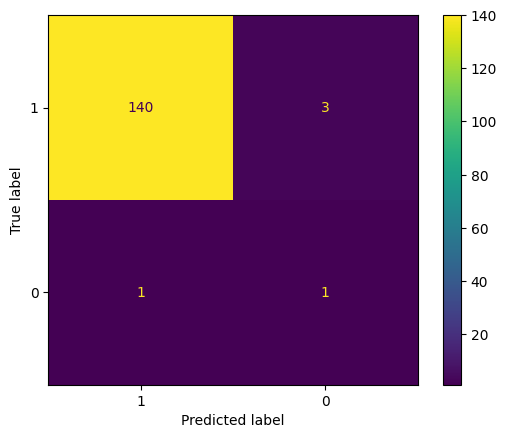

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred_lr)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot(cmap='viridis', values_format='')
plt.show()

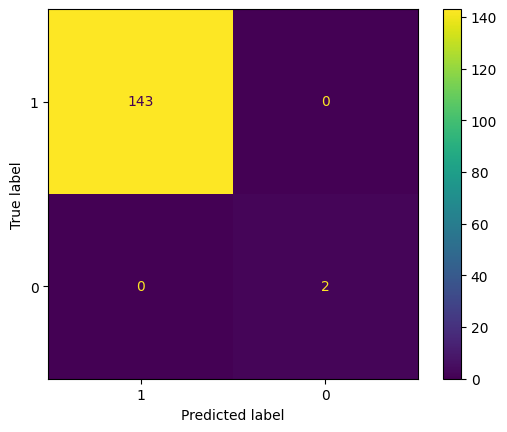

In [44]:
matrix = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot(cmap='viridis', values_format='')
plt.show()

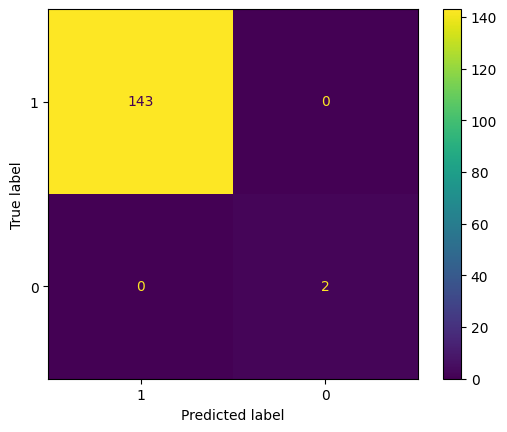

In [45]:
matrix = confusion_matrix(y_test, y_pred_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1, 0])
disp.plot(cmap='viridis', values_format='')
plt.show()